In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#  Create data set 
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [4]:
#Clean data row that HousePower = NAN in dataset 
dataset = raw_dataset.dropna()

In [5]:
#Splict Origin col to 3 col that relate to 3 types of car  
Pop_col_Origin = dataset.pop("Origin")
dataset['Cartype_1'] = (Pop_col_Origin == 1)*1.0
dataset['Cartype_2'] = (Pop_col_Origin == 2)*1.0
dataset['Cartype_3'] = (Pop_col_Origin == 3)*1.0 


C:\Users\Warit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Warit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Warit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [6]:
#generate trianing and test data 
train_dataset = dataset.sample(frac=0.75 , random_state=0 )
test_dataset  = dataset.drop(train_dataset.index)

#generate label trianing and test data use to visualize and calculate 
label_train_dataset  = train_dataset.pop("MPG")
label_test_dataset   = test_dataset.pop("MPG")


In [7]:
#generate trianing and test data 
norm_train_dataset = (train_dataset   -  train_dataset.mean() ) /train_dataset.std()
norm_test_dataset = (test_dataset   -  train_dataset.mean() ) /train_dataset.std()

In [76]:
#Build Model
model = keras.Sequential([
    layers.Dense(64, activation = "linear" ,input_shape =[len(norm_test_dataset.keys()) ]) ,
    layers.Dense(64, activation = "relu" ) ,
    layers.Dense(1)
])
optimizers = keras.optimizers.RMSprop(lr=0.0012 )
model.compile(loss='mean_squared_error',optimizer= optimizers , metrics=['mean_absolute_error', 'mean_squared_error'])

In [77]:
# Display training progress by printing a single dot for each completed epoch  
#// Copy all visualize section from tutorial , Don't read their doc except training ,
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')

EPOCHS = 2500

history = model.fit(
  norm_train_dataset, label_train_dataset,
  epochs=EPOCHS, validation_split = 0.15 , verbose=0,
  callbacks=[PrintDot()])


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [78]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [79]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
               label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
               label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()



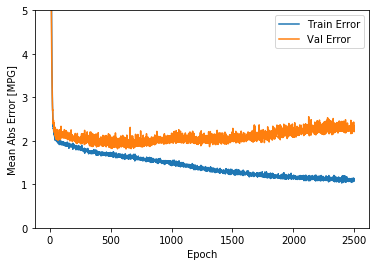

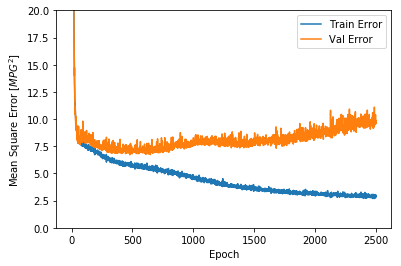

In [80]:
plot_history(history)

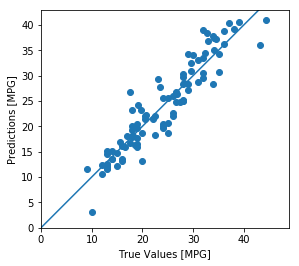

In [81]:
test_predictions = model.predict(norm_test_dataset).flatten()

plt.scatter(label_test_dataset, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

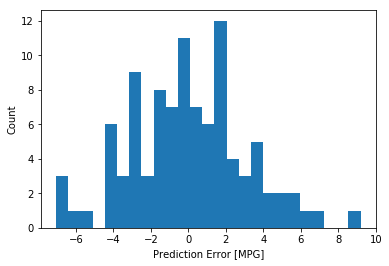

In [82]:
error = test_predictions - label_test_dataset
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")